In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from .npy files
X = np.load('/content/X.npy')
y = np.load('/content/y.npy')

print(f"Shape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

# Ensure X and y are appropriate for classification
if X.ndim == 1:
    X = X.reshape(-1, 1) # Reshape if X is 1D

if len(np.unique(y)) < 2:
    print("Error: y must contain at least 2 unique classes for LDA/QDA.")
elif len(np.unique(y)) > len(X):
    print("Error: Number of unique classes in y is greater than the number of samples.")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize and fit LDA model
    lda = LinearDiscriminantAnalysis()
    try:
        lda.fit(X_train, y_train)
        print("\nLinear Discriminant Analysis (LDA) fitted successfully.")
        lda_pred = lda.predict(X_test)
        lda_accuracy = accuracy_score(y_test, lda_pred)
        print(f"LDA Test Accuracy: {lda_accuracy:.4f}")
    except Exception as e:
        print(f"Error fitting LDA: {e}")

    # Initialize and fit QDA model
    qda = QuadraticDiscriminantAnalysis()
    try:
        qda.fit(X_train, y_train)
        print("\nQuadratic Discriminant Analysis (QDA) fitted successfully.")
        qda_pred = qda.predict(X_test)
        qda_accuracy = accuracy_score(y_test, qda_pred)
        print(f"QDA Test Accuracy: {qda_accuracy:.4f}")
    except Exception as e:
        print(f"Error fitting QDA: {e}")


Shape of features (X): (912, 817)
Shape of labels (y): (912,)

Linear Discriminant Analysis (LDA) fitted successfully.
LDA Test Accuracy: 0.5255

Quadratic Discriminant Analysis (QDA) fitted successfully.
QDA Test Accuracy: 0.5182


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [2]:
print("\n--- LDA Model --- ")
# Make predictions on the training data for LDA
lda_train_pred = lda.predict(X_train)

# Calculate LDA training accuracy
lda_train_accuracy = accuracy_score(y_train, lda_train_pred)
print(f"LDA Training Accuracy: {lda_train_accuracy:.4f}")

# Calculate LDA training error
lda_train_error = 1 - lda_train_accuracy
print(f"LDA Training Error: {lda_train_error:.4f}")

# Calculate LDA testing error (lda_accuracy from previous step)
lda_test_error = 1 - lda_accuracy
print(f"LDA Testing Error: {lda_test_error:.4f}")

print("\n--- QDA Model --- ")
# Make predictions on the training data for QDA
qda_train_pred = qda.predict(X_train)

# Calculate QDA training accuracy
qda_train_accuracy = accuracy_score(y_train, qda_train_pred)
print(f"QDA Training Accuracy: {qda_train_accuracy:.4f}")

# Calculate QDA training error
qda_train_error = 1 - qda_train_accuracy
print(f"QDA Training Error: {qda_train_error:.4f}")

# Calculate QDA testing error (qda_accuracy from previous step)
qda_test_error = 1 - qda_accuracy
print(f"QDA Testing Error: {qda_test_error:.4f}")


--- LDA Model --- 
LDA Training Accuracy: 1.0000
LDA Training Error: 0.0000
LDA Testing Error: 0.4745

--- QDA Model --- 
QDA Training Accuracy: 0.9906
QDA Training Error: 0.0094
QDA Testing Error: 0.4818


## Plot Confusion Matrices

### Subtask:
Generate and plot confusion matrices for both LDA and QDA models. Each model will have a confusion matrix for the training set and another for the testing set. Ensure plots are clearly labeled with titles, axes labels, and colorbars where appropriate.


**Reasoning**:
To visualize the performance of the LDA and QDA models on both training and testing datasets, I will generate confusion matrices. This requires importing `matplotlib.pyplot` for plotting and `ConfusionMatrixDisplay` from `sklearn.metrics` to easily plot the matrices.



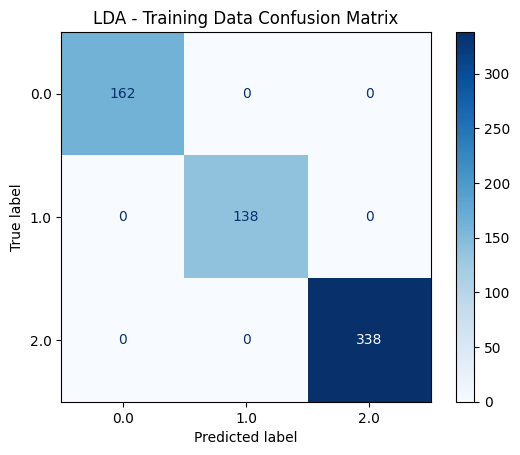

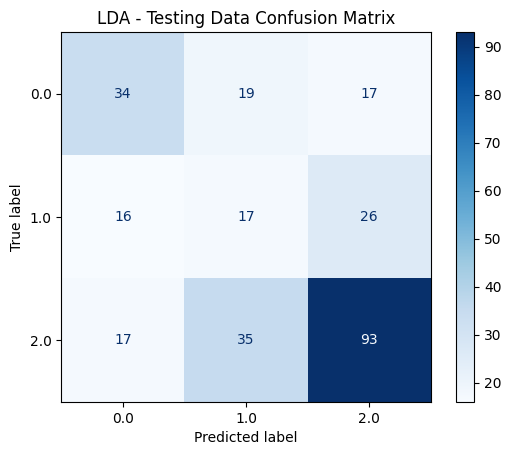

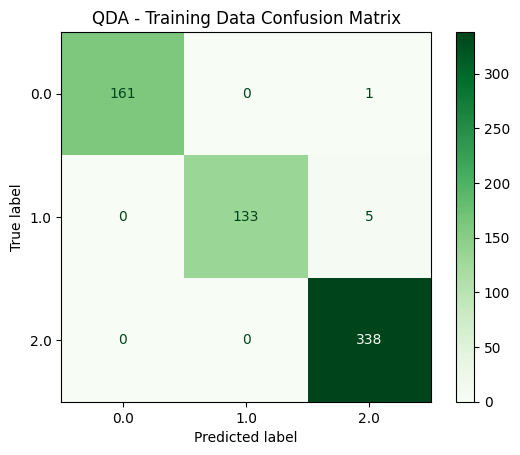

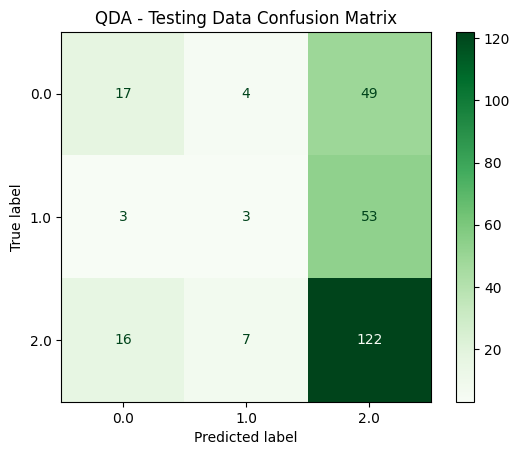

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix for LDA - Training Data
display = ConfusionMatrixDisplay.from_predictions(y_train, lda_train_pred, cmap=plt.cm.Blues)
display.ax_.set_title('LDA - Training Data Confusion Matrix')
plt.show()

# Plot Confusion Matrix for LDA - Testing Data
display = ConfusionMatrixDisplay.from_predictions(y_test, lda_pred, cmap=plt.cm.Blues)
display.ax_.set_title('LDA - Testing Data Confusion Matrix')
plt.show()

# Plot Confusion Matrix for QDA - Training Data
display = ConfusionMatrixDisplay.from_predictions(y_train, qda_train_pred, cmap=plt.cm.Greens)
display.ax_.set_title('QDA - Training Data Confusion Matrix')
plt.show()

# Plot Confusion Matrix for QDA - Testing Data
display = ConfusionMatrixDisplay.from_predictions(y_test, qda_pred, cmap=plt.cm.Greens)
display.ax_.set_title('QDA - Testing Data Confusion Matrix')
plt.show()

## Plot ROC Curves

### Subtask:
Generate and plot multi-class ROC (Receiver Operating Characteristic) curves for both LDA and QDA models. This will involve computing probability predictions for both training and testing sets. For each model, plot separate ROC curves (one-vs-rest) for each class on both training and testing data. Ensure plots have appropriate titles, axis labels, and legends indicating the class and AUC score.


**Reasoning**:
I need to implement the instructions to generate and plot multi-class ROC curves for both LDA and QDA models on training and testing data. This involves importing specific modules, binarizing labels, predicting probabilities, calculating ROC curve components (fpr, tpr, auc) for each class, and then plotting these curves with appropriate labels and titles.



Generating ROC curves for LDA Model...


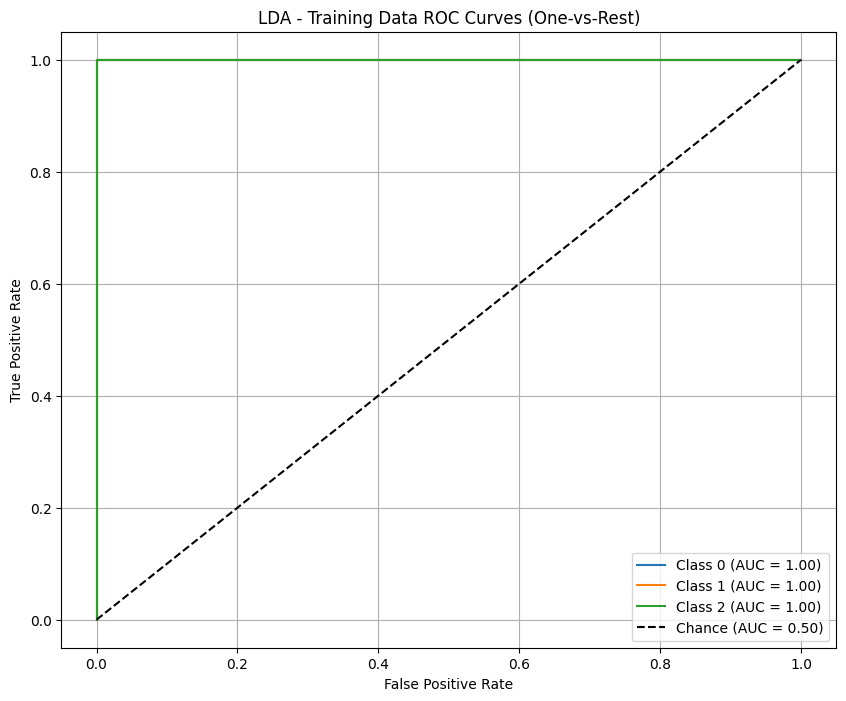

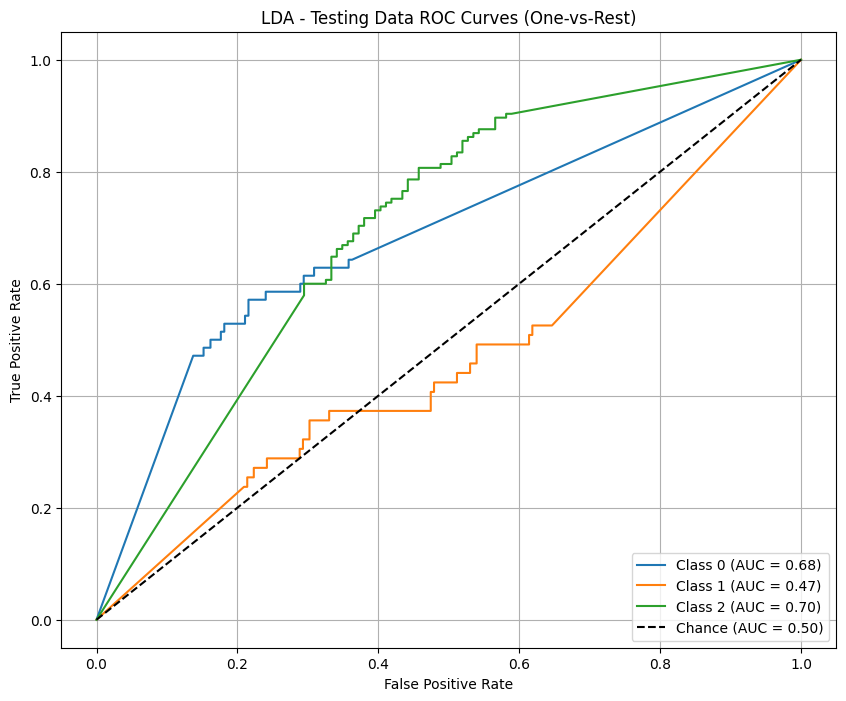

Generating ROC curves for QDA Model...


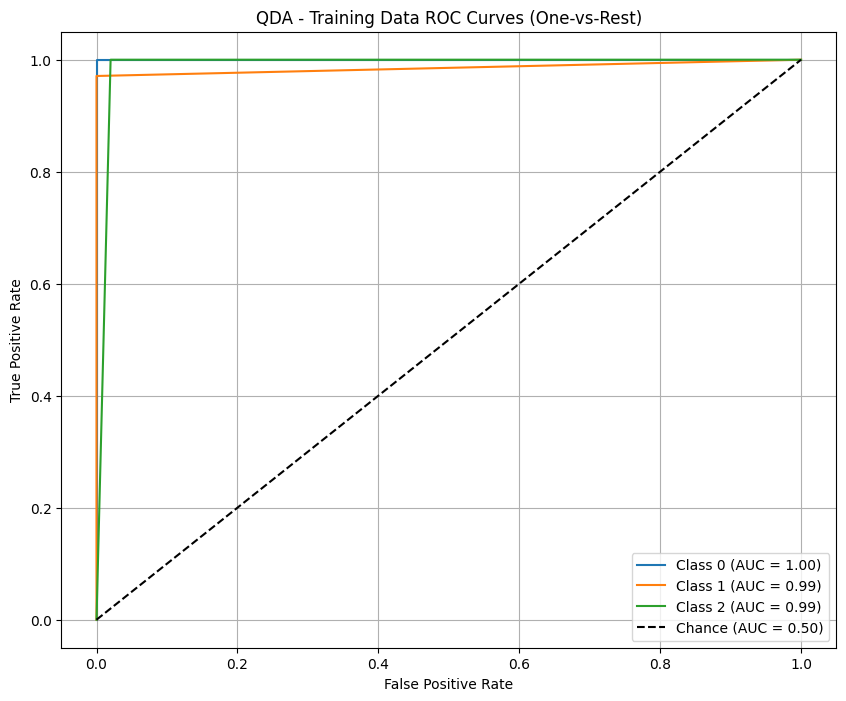

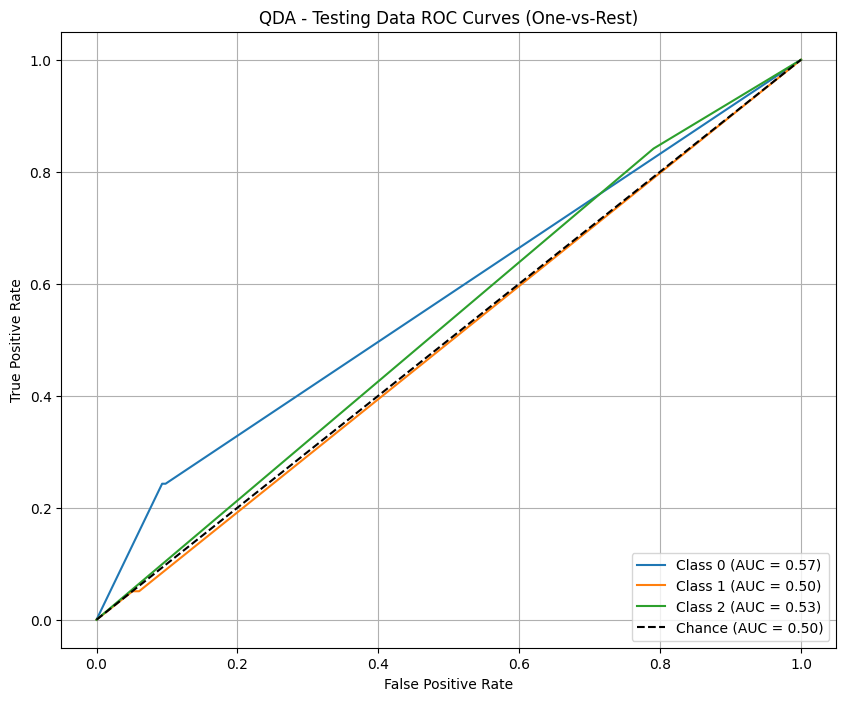

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.preprocessing import LabelBinarizer

# Get unique classes from y
classes = np.unique(y)

# Create an instance of LabelBinarizer and fit it to the true labels (y)
# This prepares it for transforming y_train and y_test into a one-hot encoded format.
lb = LabelBinarizer()
lb.fit(y)

# Transform true labels to one-hot encoding for multi-class ROC
y_train_bin = lb.transform(y_train)
y_test_bin = lb.transform(y_test)

# --- LDA Model ROC Curves ---
print("Generating ROC curves for LDA Model...")
# Predict class probabilities for the training set
lda_train_proba = lda.predict_proba(X_train)
# Predict class probabilities for the testing set
lda_test_proba = lda.predict_proba(X_test)

# Plot ROC Curves for LDA - Training Data
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], lda_train_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {int(class_label)} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA - Training Data ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC Curves for LDA - Testing Data
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], lda_test_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {int(class_label)} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA - Testing Data ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- QDA Model ROC Curves ---
print("Generating ROC curves for QDA Model...")
# Predict class probabilities for the training set
qda_train_proba = qda.predict_proba(X_train)
# Predict class probabilities for the testing set
qda_test_proba = qda.predict_proba(X_test)

# Plot ROC Curves for QDA - Training Data
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], qda_train_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {int(class_label)} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QDA - Training Data ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC Curves for QDA - Testing Data
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], qda_test_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {int(class_label)} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QDA - Testing Data ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the performance of LDA and QDA models based on the confusion matrices and ROC curves, highlighting any significant observations regarding training vs. testing performance and differences between the models.


## Summary:

### Q&A
The performance of the LDA and QDA models can be summarized as follows:

*   **Training vs. Testing Performance:** Both LDA and QDA models exhibit significant overfitting. LDA achieved a perfect training accuracy of 1.0000 (0.0000 training error), but its testing error was 0.4745. Similarly, QDA had a high training accuracy of 0.9906 (0.0094 training error) but a testing error of 0.4818. This substantial discrepancy indicates that both models learned the training data too well and failed to generalize effectively to unseen data.
*   **Differences Between the Models:** While both models overfit, LDA performed marginally better on the testing set with a slightly lower testing error (0.4745) compared to QDA (0.4818). The generated confusion matrices would visually highlight the specific misclassifications contributing to these high testing errors, and the ROC curves with their Area Under the Curve (AUC) scores would demonstrate the models' discriminative power per class, likely showing excellent performance on the training data and significantly reduced performance on the testing data.

### Data Analysis Key Findings
*   The Linear Discriminant Analysis (LDA) model achieved a perfect training accuracy of 1.0000 (0.0000 training error).
*   The Quadratic Discriminant Analysis (QDA) model achieved a very high training accuracy of 0.9906 (0.0094 training error).
*   Both models demonstrated a substantial drop in performance on unseen data, with LDA having a testing error of 0.4745 and QDA having a testing error of 0.4818, indicating significant overfitting.
*   LDA performed marginally better on the testing set, showing a slightly lower testing error (0.4745) compared to QDA (0.4818).
*   Confusion matrices and multi-class ROC curves were successfully generated for both models across training and testing datasets, providing detailed insights into class-wise prediction performance and discriminative capabilities.

### Insights or Next Steps
*   The severe overfitting observed in both models suggests that they are too complex for the given dataset, or that the dataset may require further preprocessing, feature engineering, or a larger sample size to improve generalization.
*   Consider applying regularization techniques, exploring simpler classification algorithms, or investigating the possibility of feature selection/dimensionality reduction to mitigate overfitting and improve test set performance.
